### Customer Segmentation with K-Means Clustering

- In this example, I aim to create a Segmentation with customers who behave the same

- Investigate what are the common traits / behaviours in each Segment / Cluster

- Deploy our results in Power BI for the business to use

- Automate all this process for future data


### Importing / Installing packages

In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.cluster import KMeans, k_means

%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
sns.set(rc={'figure.figsize':(8,6)})


## 5. Loading the Raw Data into Python

In [3]:

customer_seg = pd.read_csv('data/Events Raw Data.csv')
print(customer_seg.shape)
customer_seg.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis & Data Cleaning


In [4]:
# Checking for null values

customer_seg.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [5]:
# Visualize the NULL observations


customer_seg['Total_Household_Income'].isnull()



0        False
1        False
2        False
3        False
4        False
         ...  
14778    False
14779    False
14780    False
14781    False
14782    False
Name: Total_Household_Income, Length: 14783, dtype: bool

In [6]:
# Deleting the NULL values
customer_seg = customer_seg.dropna(subset = ['Total_Household_Income'])

# Printing the shape
print(customer_seg.shape)

# Visualize the NULL observations
customer_seg.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [7]:
# Investigate all the elements whithin each Feature 

for column in customer_seg:
    unique_vals = np.unique(customer_seg[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [8]:
# Getting the columns we need

customer_seg.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

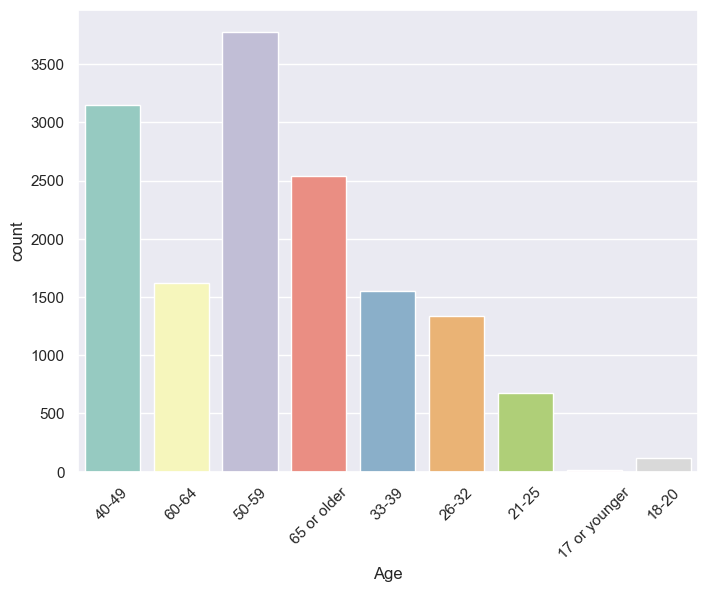

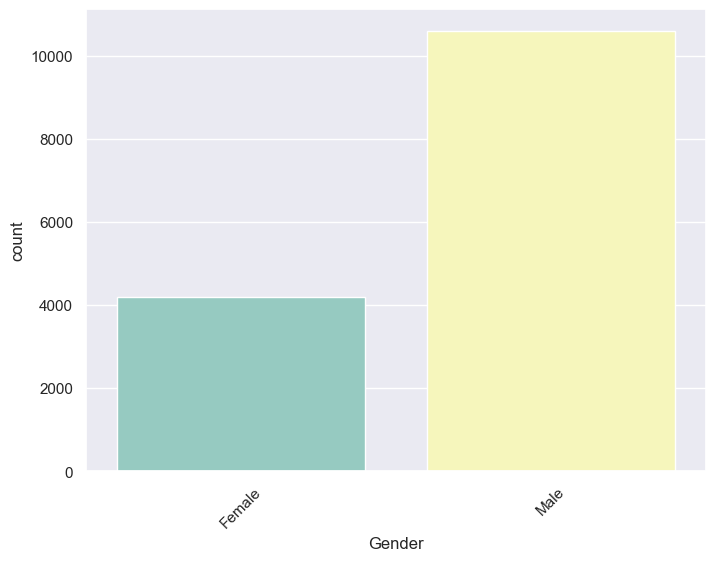

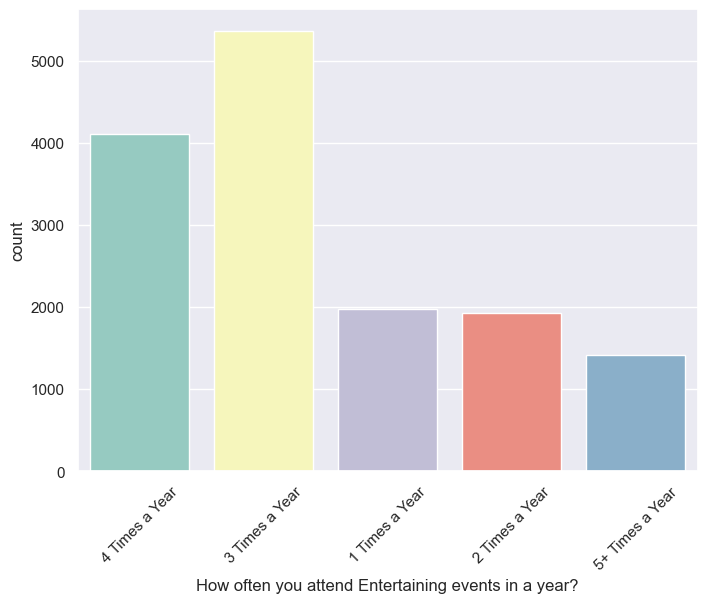

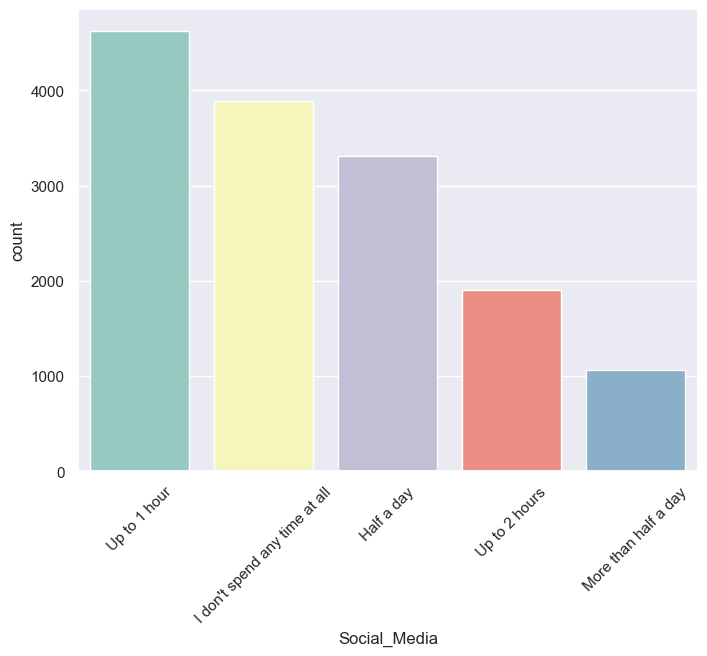

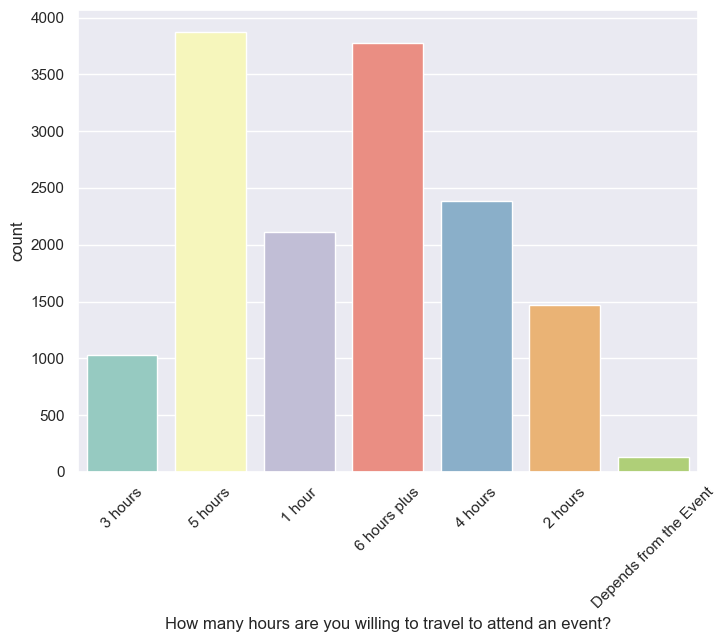

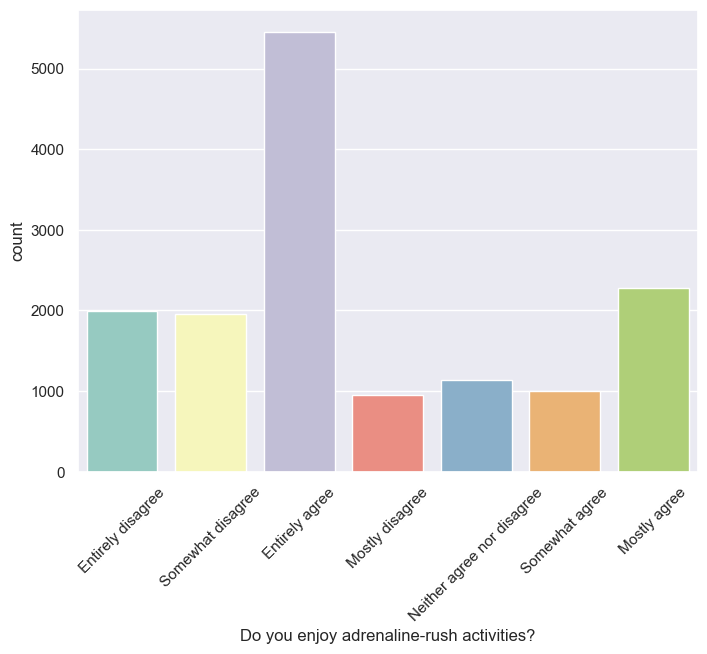

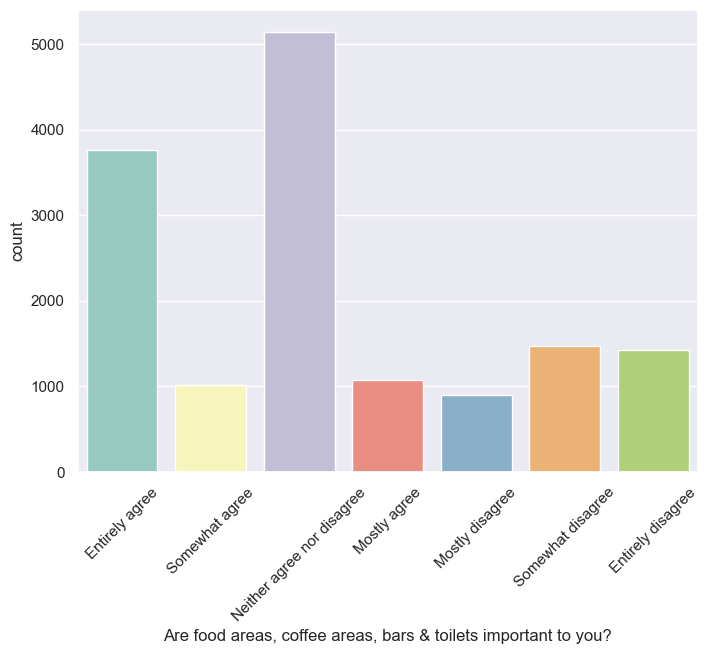

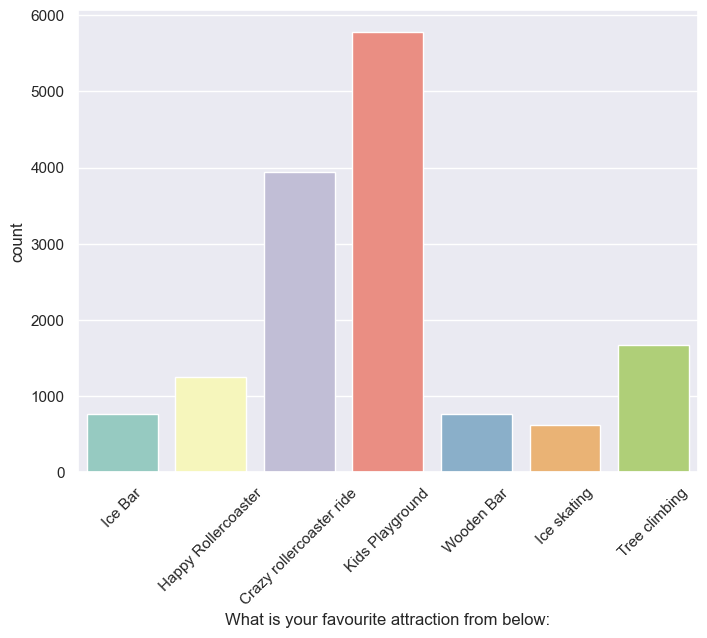

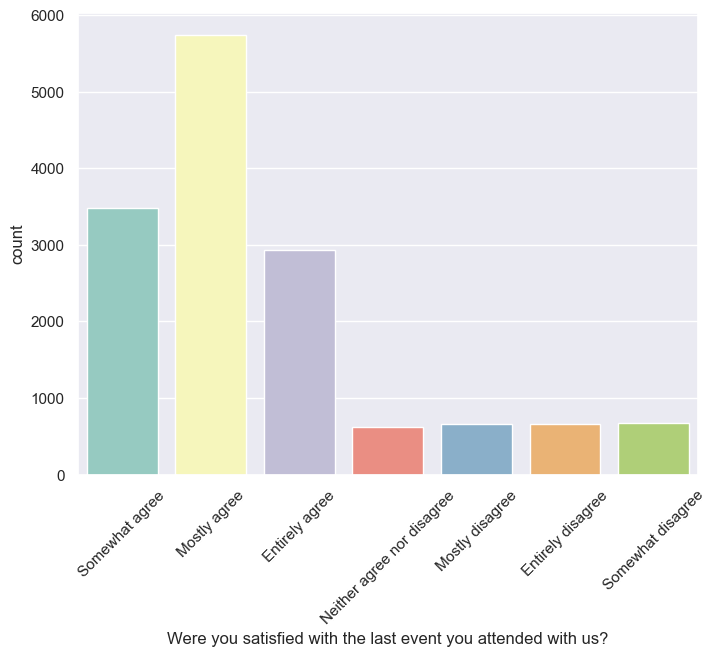

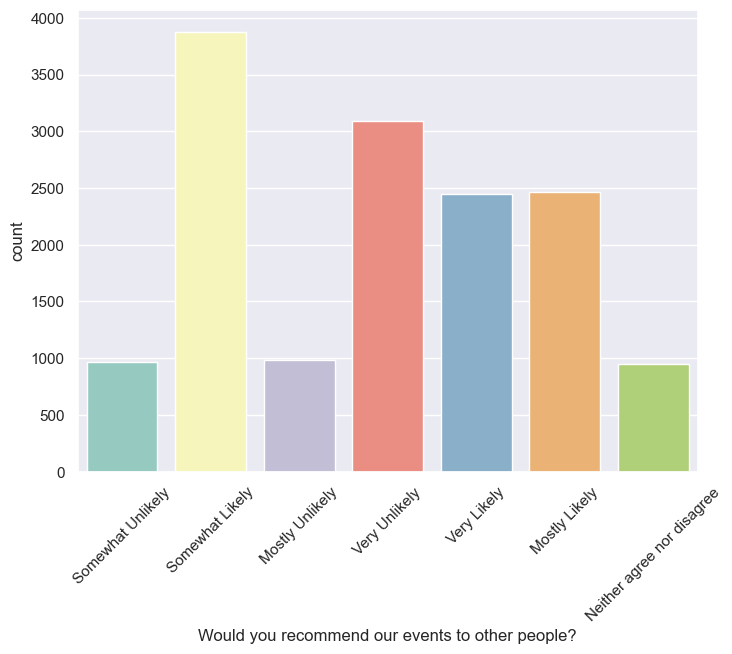

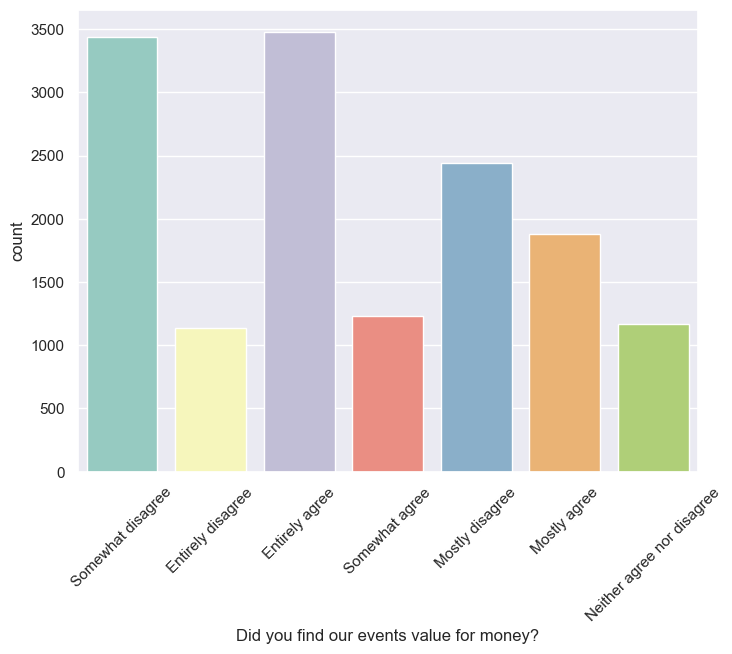

In [9]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Age', 'Gender', 
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = customer_seg, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    


### 5.2 Feature Engineering - Numeric Representation

In [10]:
# Making categorical variables into numeric representation

print(customer_seg.shape)

# keeping the columns we need 
customer_seg2 = customer_seg[features]
print(customer_seg2.shape)

# Making categorical variables into numeric representation
new_customer_seg = pd.get_dummies(customer_seg2, columns = features)


print(new_customer_seg.shape)
# print the shape

new_customer_seg.head()



(14778, 19)
(14778, 11)
(14778, 70)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [11]:
customer_seg2.head()

,Age,Gender,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 6.0 K-means Clustering

In [12]:
# Running Kmeans

X_train = new_customer_seg.values

# It is jus a random number to start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [4 4 4 ... 4 1 4]
The Inertia is:  82917.05012143351


In [13]:
kmeans.labels_.shape

(14778,)

every customer has one clusters and that is what it is equvalent to number of row data.

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [14]:
# Running K means with multible Ks

no_of_clusters = range(2,20) 
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)




The innertia for : 2 Clusters is: 105612.5030524997
The innertia for : 3 Clusters is: 95926.61668751633
The innertia for : 4 Clusters is: 88367.70434528674
The innertia for : 5 Clusters is: 82917.0481600994
The innertia for : 6 Clusters is: 79486.7609095423
The innertia for : 7 Clusters is: 76624.67083125666
The innertia for : 8 Clusters is: 74008.57047201571
The innertia for : 9 Clusters is: 72327.88488903508
The innertia for : 10 Clusters is: 71376.68881643725
The innertia for : 11 Clusters is: 70357.10235207214
The innertia for : 12 Clusters is: 69457.15994159992
The innertia for : 13 Clusters is: 68826.91594988124
The innertia for : 14 Clusters is: 68032.36279066437
The innertia for : 15 Clusters is: 66844.77617665027
The innertia for : 16 Clusters is: 66532.94516110411
The innertia for : 17 Clusters is: 66169.84387578242
The innertia for : 18 Clusters is: 65551.43468057862
The innertia for : 19 Clusters is: 64994.66603738034


As you can see above as the number of clusters increaes the innertia decreases. So how do we choose the best number of clusters?

Text(0.5, 1.0, 'Inertia Plot per k')

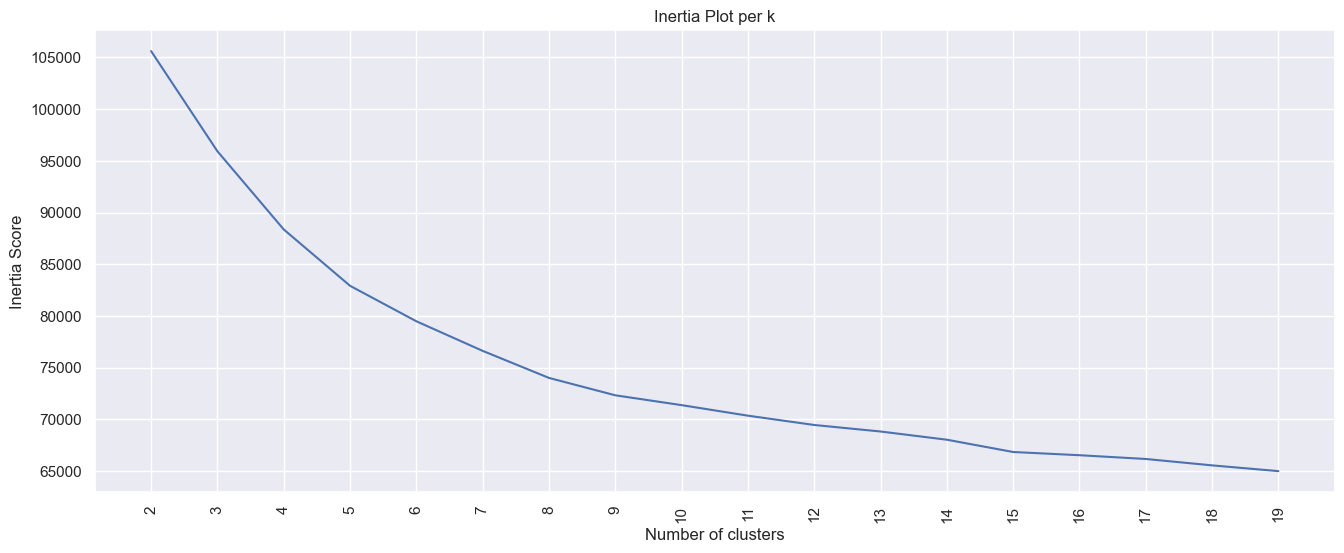

In [15]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [16]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,1235,2270,989,8420,1864


In [17]:
kmeans.labels_

array([3, 3, 3, ..., 3, 1, 3], dtype=int32)

In [18]:
predictions

array([3, 3, 3, ..., 3, 1, 3], dtype=int32)

### 7.0 Running Principal Component Analysis (PCA) to Visualize & Improve Results


At the beggining we only choose two components.

Explained variance ratio (first two components): [0.173591 0.084531]


<Figure size 800x600 with 0 Axes>

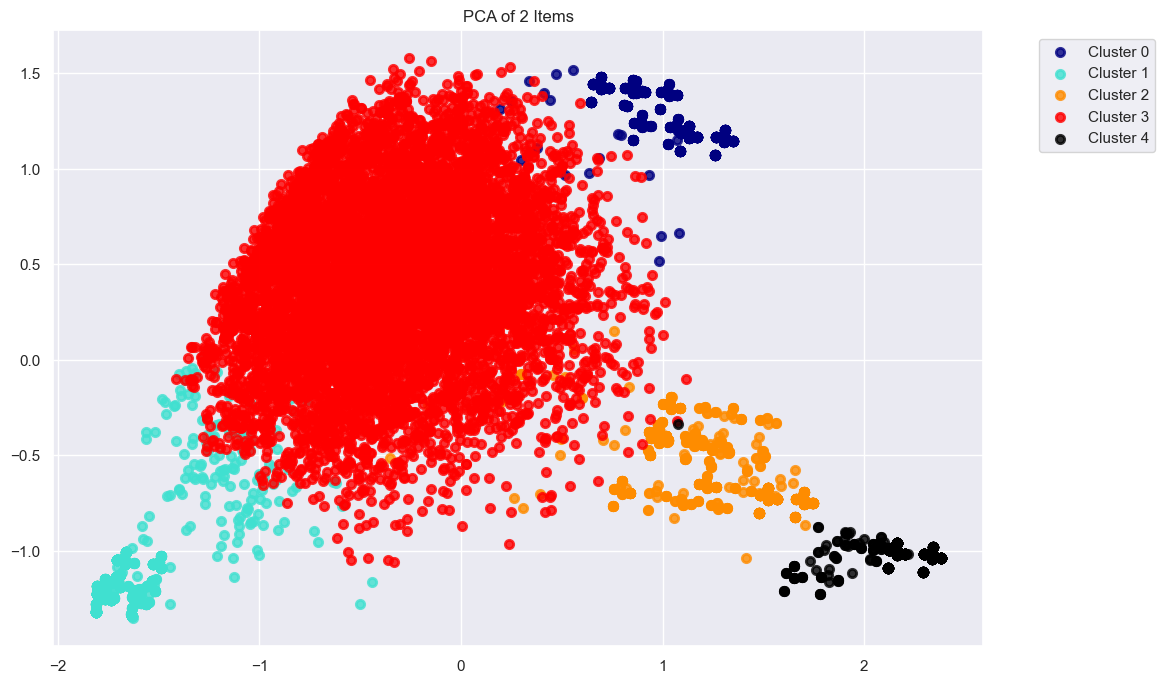

In [19]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

The graph above is not actulaly representing the qualty of our results. This garph consists of of 2 pricipal components and explains only the 25% of the variance of the data set.

### 7.1. Identifying the Best Number of Components


Total Variance in our dataset is:  8.26028693111268
The 95% variance we want to have is:  7.847272584557045

Variance explain with 30 n_compononets:  6.988457629065603
Variance explain with 35 n_compononets:  7.3357886664725545
Variance explain with 40 n_compononets:  7.646317292270922
Variance explain with 41 n_compononets:  7.702655183330822
Variance explain with 50 n_compononets:  8.116115160210802
Variance explain with 53 n_compononets:  8.198408631489478
Variance explain with 55 n_compononets:  8.229113821752051
Variance explain with 60 n_compononets:  8.26028693111268


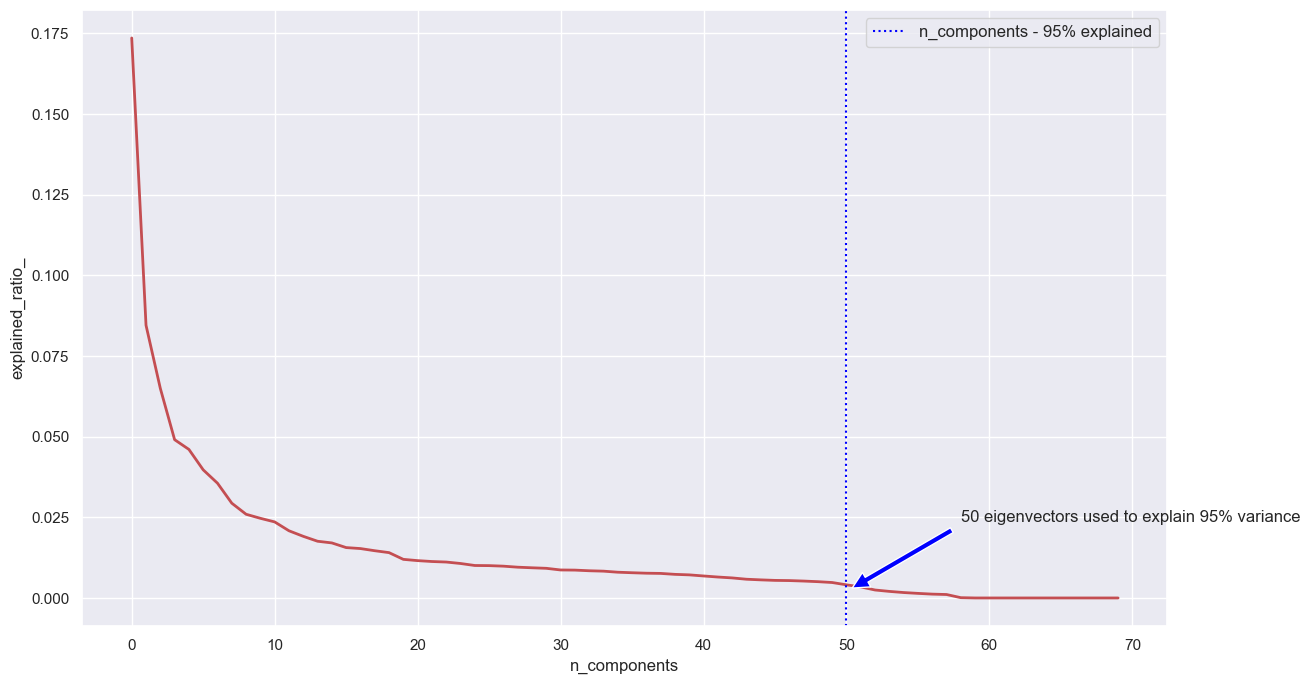

In [20]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(50,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('50 eigenvectors used to explain 95% variance', xy=(50, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()



Above I tried to find the best number of compononets that hits 95% variance we want to have is:  7.847272584557045. Therefore I chose Variance explain with 50 n_compononets:  8.116115160210802.

I would like to re-run the PCA using 50 principal component and re-run K-means just see if we have managed the improve our result. 

The innertia for : 2 Clusters is: 103484.5854902027
The innertia for : 3 Clusters is: 93801.88984520803
The innertia for : 4 Clusters is: 86255.23935297216
The innertia for : 5 Clusters is: 80814.6130962581
The innertia for : 6 Clusters is: 77391.79466891935
The innertia for : 7 Clusters is: 74531.60828084653
The innertia for : 8 Clusters is: 71915.9749248614
The innertia for : 9 Clusters is: 70258.06976575399
The innertia for : 10 Clusters is: 69271.93250913874
The innertia for : 11 Clusters is: 68143.43234701004
The innertia for : 12 Clusters is: 67283.71420815933
The innertia for : 13 Clusters is: 66506.37147913125
The innertia for : 14 Clusters is: 65573.43181815374
The innertia for : 15 Clusters is: 65109.621105323764
The innertia for : 16 Clusters is: 64841.89599643386
The innertia for : 17 Clusters is: 64020.43528462516
The innertia for : 18 Clusters is: 63389.428245751704
The innertia for : 19 Clusters is: 62856.42110672081


Text(0.5, 1.0, 'Inertia Plot per k')

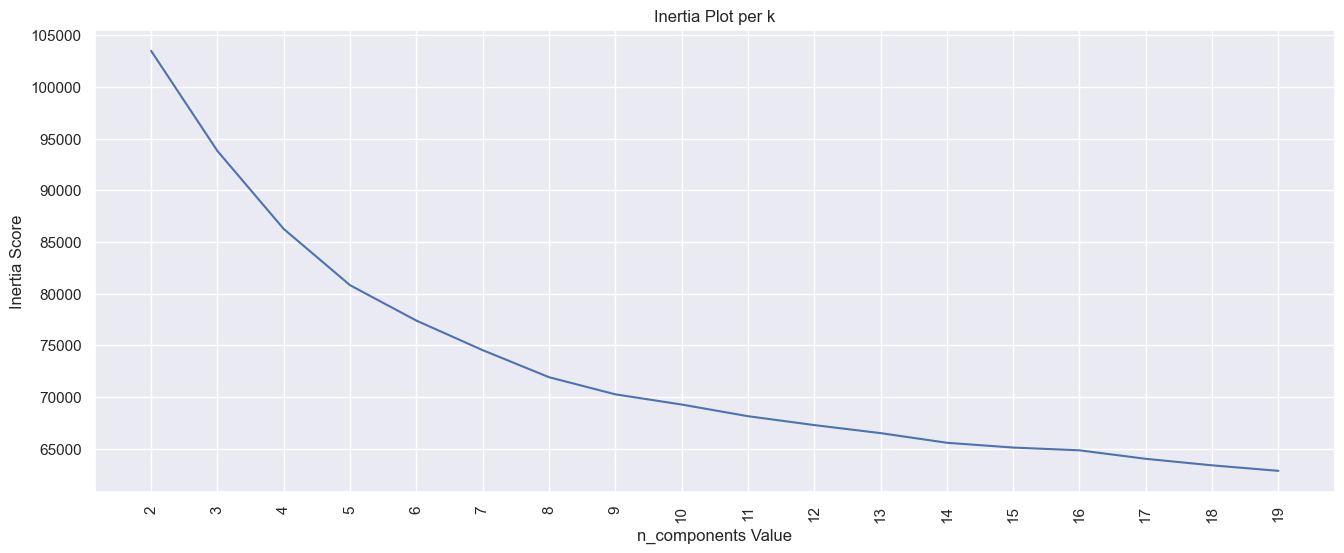

In [21]:
# Running PCA again

pca = PCA(n_components=50, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

When I compare the result that I had with 2 components with the above you see that the result has improved. I have lower innertia here after running PCA.

#### How to improve the results?

I combined different variables actually make sense. When I did the explonatory data analysis from the graphs you see that we can I actually combine the similiar group. Below I combined the groups.

In [22]:
# Visualizing all of your variables / columns
new_customer_seg.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Entertaining events in a year?_2 Times a Year',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       'How often you attend Entertaining events in a year?_4 Times a Year',
       'How often you attend Entertaining events in a year?_5+ Times a Year',
       'Social_Media_Half a day', 'Social_Media_I don't spend any time at all',
       'Social_Media_More than half a day', 'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
       'How many hours are you willing to travel to attend an event?_1 hour',
       'How many hours are you willing to travel to attend an event?_2 hours',
       'How many hours are you willing to travel to attend an event?_3 hours',
    

In [23]:
print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 70)


In [25]:
# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column
# 1-2 times
#two varibales one  / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
# two variables one / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# two varibales one / columns
new_customer_seg['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (new_customer_seg['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/4289626017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# Visualizing all of your variables / columns


In [ ]:
# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column
# 1-2 times
#two varibales one  / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
# two variables one / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(# two varibales one / columns
new_customer_seg['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (new_customer_seg['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1


In [27]:
#4-5 times

#two varibales one  / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_3_or_4_times'] = 0
# two variables one / columns
new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_3_or_4_times'][(# two varibales one / columns
new_customer_seg['How often you attend Entertaining events in a year?_3 Times a Year'] == 1) |     (new_customer_seg['How often you attend Entertaining events in a year?_4 Times a Year'] == 1)] = 1
print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 72)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/1006343681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_often_you_attend_entertaining_events_in_a_year_3_or_4_times'][(# two varibales one / columns


In [28]:
# Cleaning the "social_media" column

# half a day + more than half a day

#two varibales one  / columns
new_customer_seg['social_media_half_day_or_more_than_half_day'] = 0
# two variables one / columns
new_customer_seg['social_media_half_day_or_more_than_half_day'][(# two varibales one / columns
new_customer_seg['Social_Media_Half a day'] == 1) |     (new_customer_seg['Social_Media_More than half a day'] == 1)] = 1
print("The shape is: ", new_customer_seg.shape)


The shape is:  (14778, 73)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/3650936789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['social_media_half_day_or_more_than_half_day'][(# two varibales one / columns


In [ ]:
# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

In [31]:
# 1 to 2 hours
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours'] = 0
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_4_hours'] = 0
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_4_hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 76)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/388585153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1_to 2_hours'][(new_customer_seg['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_customer_seg['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1
/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/388585153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3_to_

In [ ]:
# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

In [33]:

# Mostly & Somewhat Agree
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree'] = 0
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree'][(new_customer_seg['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree'] = 0
new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree'][(new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | (new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)

The shape is:  (14778, 78)


/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/1321669203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Agree'][(new_customer_seg['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_customer_seg['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1
/var/folders/x4/7dj5h2k169zg8ydvm5tbmcc00000gn/T/ipykernel_7191/1321669203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_seg['do_you_enjoy_adrenaline_rush_activities_Mostly_Somewhat_Disagree'][(new_customer_seg['Do you enjoy

In [ ]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

In [34]:
# Mostly & Somewhat Agree
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_Agree'] = 0
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_Agree'][('new_customer_seg[Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_entirely_Disagree'] = 0
new_customer_seg['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly_Somewhat_entirely_Disagree'][(new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (new_customer_seg['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1) | (new_customer_seg['Did you find our events value for money?_Entirely disagree'] == 1)] = 1

print("The shape is: ", new_customer_seg.shape)



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1971825815.py, line 3)